# List of project's dependencies
Below are listed imports that are needed for program to work properly commented with required install (see also requirements.txt)

In [91]:
#List of imports
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# Loading data
To properly load data you need to download dataset from [link](https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data)
and paste it to `./data` directory.


In [92]:
#apartment rental data
price_data_array : list = [
    '../data/apartments_pl_2023_08.csv',
    '../data/apartments_pl_2023_09.csv', 
    '../data/apartments_pl_2023_10.csv',
    '../data/apartments_pl_2023_11.csv', 
    '../data/apartments_pl_2023_12.csv',
    '../data/apartments_pl_2024_01.csv', 
    '../data/apartments_pl_2024_02.csv',
    '../data/apartments_pl_2024_03.csv', 
    '../data/apartments_pl_2024_04.csv' 
]

price_data_array_rent : list = [
    '../data/apartments_rent_pl_2023_11.csv', 
    '../data/apartments_rent_pl_2023_12.csv',
    '../data/apartments_rent_pl_2024_01.csv', 
    '../data/apartments_rent_pl_2024_02.csv',
    '../data/apartments_rent_pl_2024_03.csv', 
    '../data/apartments_rent_pl_2024_04.csv' 
]


def load_data(source_list: list):
    return pd.concat([pd.read_csv(data_set)for data_set in source_list])


data = load_data(price_data_array)

# Data statistics visualization
## Description

In [93]:
data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [94]:
data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,153836.000000,153836.000000,126215.000000,151874.000000,128199.000000,153836.000000,153836.000000,153836.000000,153836.000000,153688.000000,153232.000000,153628.000000,153666.000000,153432.000000,149541.000000,153611.000000,1.538360e+05
mean,59.106762,2.692712,3.317126,5.270599,1985.703336,52.033875,19.463143,4.327628,20.705901,0.413220,0.969583,0.517386,0.370083,0.347417,1.442457,0.360438,7.731120e+05
std,21.576561,0.920367,2.515351,3.290654,34.070959,1.341967,1.786950,2.846466,24.425790,0.467913,0.890867,0.502589,0.450806,0.470033,1.104005,0.463813,4.027751e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.978999,14.447100,0.010000,0.000000,0.002000,0.001000,0.001000,0.001000,0.001000,0.004000,0.001000,1.500000e+05
25%,44.390000,2.000000,2.000000,3.000000,1966.000000,51.110218,18.518880,1.980000,7.000000,0.175000,0.355000,0.239000,0.157000,0.114000,0.580000,0.143000,5.100000e+05
50%,55.000000,3.000000,3.000000,4.000000,1994.000000,52.195100,19.897000,3.940000,14.000000,0.291000,0.675000,0.393000,0.263000,0.230000,1.119000,0.240000,6.900000e+05
75%,69.000000,3.000000,4.000000,6.000000,2016.000000,52.417370,20.990211,6.130000,24.000000,0.468000,1.236000,0.623000,0.418000,0.410000,2.054000,0.407000,9.190000e+05
max,150.000000,6.000000,29.000000,29.000000,2024.000000,54.606460,23.207128,16.940000,212.000000,4.946000,4.999000,4.970000,4.961000,4.985000,5.000000,4.992000,3.250000e+06


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153836 entries, 0 to 19258
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    153836 non-null  object 
 1   city                  153836 non-null  object 
 2   type                  120096 non-null  object 
 3   squareMeters          153836 non-null  float64
 4   rooms                 153836 non-null  float64
 5   floor                 126215 non-null  float64
 6   floorCount            151874 non-null  float64
 7   buildYear             128199 non-null  float64
 8   latitude              153836 non-null  float64
 9   longitude             153836 non-null  float64
 10  centreDistance        153836 non-null  float64
 11  poiCount              153836 non-null  float64
 12  schoolDistance        153688 non-null  float64
 13  clinicDistance        153232 non-null  float64
 14  postOfficeDistance    153628 non-null  float64
 15  kinder

## Visualisation
### Data completness

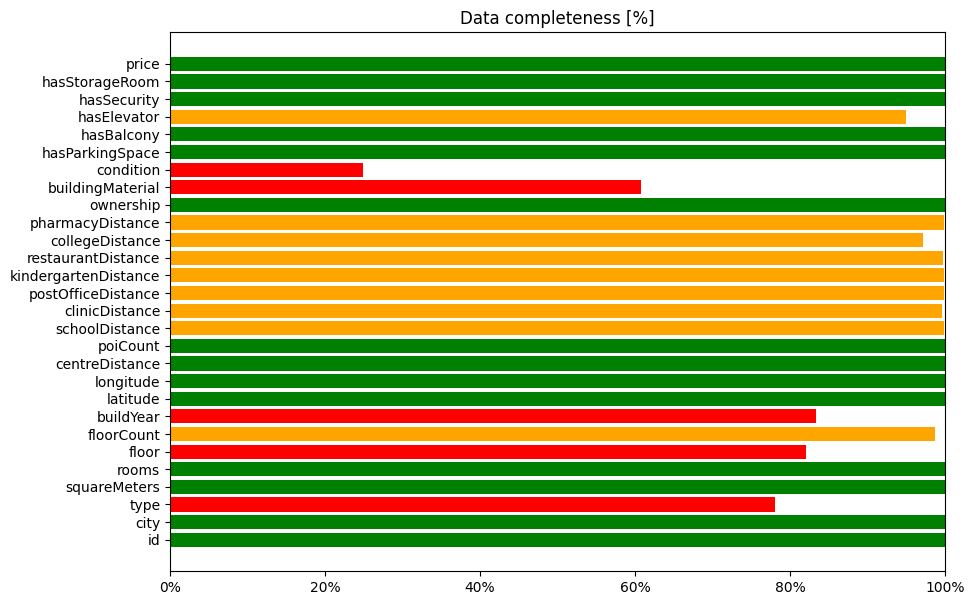

In [96]:
full_columns = []
colors = []
for column in data.columns:
    completeness = 1-len(data[data[column].isnull()])/len(data)
    full_columns.append(completeness)
    if(completeness == 1):
        colors.append('green')
    elif completeness < 0.85:
        colors.append('red')
    else:
        colors.append('orange')

def percent_formatter(x, pos):
    return str(round(x*100)) + "%"

fig, axs = plt.subplots(figsize=(10, 7))
axs.set_title("Data completeness [%]")
axs.barh(data.columns, full_columns, color=colors)
axs.set_xlim(0, 1)
axs.xaxis.set_major_formatter(percent_formatter)
plt.show()

### Size of apartment

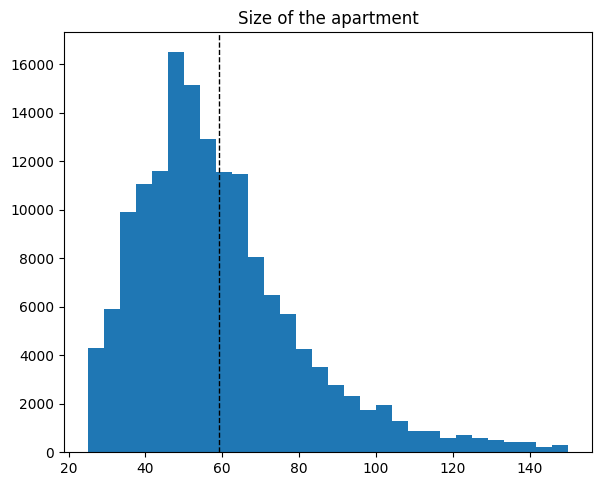

In [97]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(2,2,1)
ax.set_title('Size of the apartment')
ax.hist(data['squareMeters'], bins=30)
ax.axvline(data['squareMeters'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

### Rooms in apartment

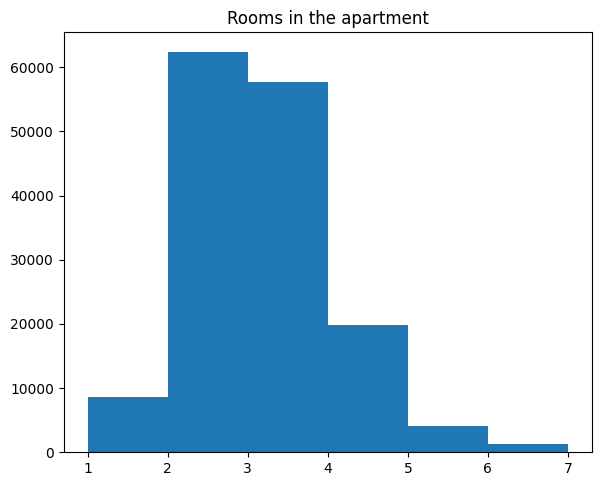

In [98]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(2,2,4)
ax.set_title('Rooms in the apartment')
ax.hist(data['rooms'], bins=[1, 2, 3, 4, 5, 6, 7])

plt.show()

### Apartment location regard to center

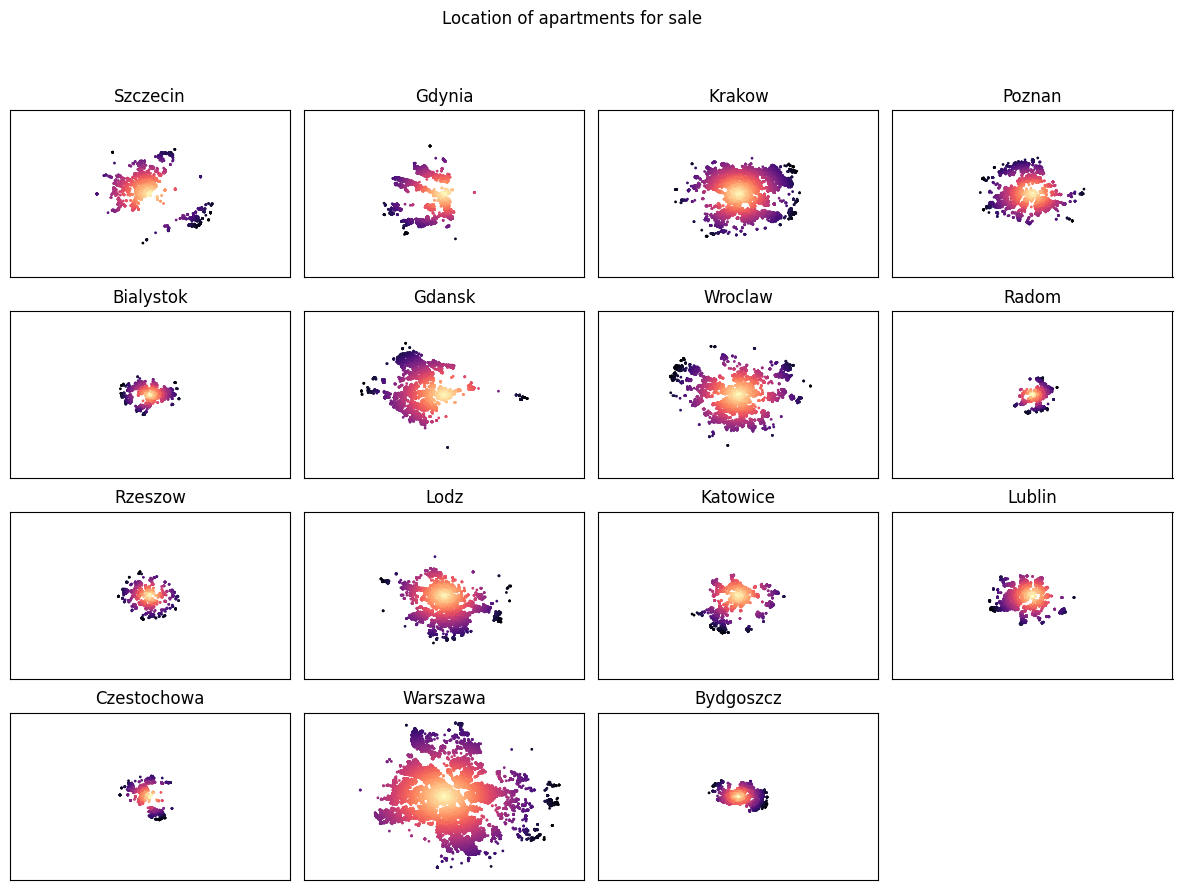

In [99]:
centers = {
  'bialystok': [53.133347, 23.1452537],
  'bydgoszcz': [53.122011, 18.000761],
  'czestochowa': [50.812423, 19.129306],
  'gdansk': [54.349367, 18.654417],
  'gdynia': [54.521023, 18.539453],
  'katowice': [50.2593349,19.0196159],
  'krakow': [50.055298, 19.938444],
  'lodz': [51.781509, 19.454770],
  'lublin': [51.247680, 22.567743],
  'poznan': [52.407893, 16.935575],
  'radom': [51.402954, 21.142391],
  'rzeszow': [50.037496, 22.005458],
  'szczecin': [53.423396, 14.560967],
  'warszawa': [52.231713,21.0035595],
  'wroclaw': [51.1106992,17.0297913]
}

city_names = data["city"].unique()
city_data = {'all cities': data}
for city in city_names:
    city_data[city] = data[data.city == city]

fig = plt.figure(figsize=(15, 10))
fig.suptitle("Location of apartments for sale")

for index, city in enumerate(city_names):
  ax = fig.add_subplot(4, 4, index+1)
  ax.set_title(city.capitalize())
  ax.set_xlim(-0.3, 0.3)
  ax.set_ylim(-0.15, 0.15)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  ax.scatter(
    city_data[city]['longitude'] - centers[city][1], 
    city_data[city]['latitude'] - centers[city][0], 
    c=city_data[city]['centreDistance'], 
    cmap='magma_r', 
    s=1
  )

plt.subplots_adjust(wspace=0.05)
plt.show()

# Preparing data

Functions used to preprocess data

In [100]:
def fill_na(df: pd.DataFrame, column_list: list, method: str='median'):
    for column in column_list:
        fill_value: float
        match method:
            case 'median':
                fill_value = df[column].median()
            case 'mean':
                fill_value = df[column].mean()
            case 'first_value':
                fill_value = df[column][0]
            case _:
                fill_value = 0
                
        df[column] =  df[column].fillna(fill_value)


def normalize_numerical_columns(df: pd.DataFrame, column_list: list):
    df[column_list] = (df[column_list] - df[column_list].min()) / (df[column_list].max() - df[column_list].min())


def normalize_data(df: pd.DataFrame, numerical_columns: list =[], categorical_columns: list=[], boolean_columns: list=[], drop_columns: list=[], fill_method:str='mean'):
    df = df.drop(drop_columns, axis=1)
    
    fill_na(df, boolean_columns, 'false')
    fill_na(df, numerical_columns, fill_method)

    df = pd.get_dummies(df, columns=categorical_columns)
    df = pd.get_dummies(df, columns=boolean_columns, drop_first=True).astype(int)

    normalize_numerical_columns(df, numerical_columns)

    return df

Preprocessing

In [101]:
data=data.drop('id', axis=1)

numerical_columns = ['squareMeters', 'rooms', 'floorCount', 'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance', 'collegeDistance', 'pharmacyDistance']
categorical_columns = ['city', 'ownership']
boolean_columns = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
drop_columns = ['condition', 'buildingMaterial', 'buildYear', 'floor', 'type']
output_column = 'price'

data = normalize_data(
    df=data, 
    numerical_columns=numerical_columns, 
    categorical_columns=categorical_columns, 
    boolean_columns=boolean_columns,
    drop_columns=drop_columns,
    fill_method='median'
)
data

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,city_wroclaw,ownership_condominium,ownership_cooperative,ownership_udział,hasParkingSpace_yes,hasBalcony_yes,hasElevator_no,hasElevator_yes,hasSecurity_yes,hasStorageRoom_yes
0,0.304,0.4,0.321429,0.8,0.000000,0.3750,0.042453,0.0,0.25,0.0,...,0,1,0,0,1,1,0,1,0,1
1,0.088,0.2,0.321429,0.8,0.000000,0.1250,0.075472,0.0,0.00,0.0,...,0,0,1,0,0,1,0,1,0,1
2,0.384,0.4,0.071429,0.8,0.000000,0.1875,0.042453,0.0,0.00,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0.496,0.4,0.071429,0.8,0.000000,0.1250,0.150943,0.0,0.00,0.0,...,0,1,0,0,1,1,1,0,0,1
4,0.328,0.4,0.071429,0.8,0.000000,0.2500,0.004717,0.0,0.25,0.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,0.648,0.8,0.035714,0.8,0.333333,0.0000,0.202830,0.0,0.00,0.0,...,0,1,0,0,0,1,1,0,0,0
19255,0.584,0.4,0.071429,0.8,0.444444,0.0000,0.231132,0.0,0.00,0.0,...,0,1,0,0,0,0,1,0,0,1
19256,0.664,0.8,0.107143,0.8,0.444444,0.0625,0.132075,0.0,0.00,0.0,...,0,1,0,0,0,0,1,0,0,1
19257,0.200,0.2,0.000000,0.8,0.444444,0.0000,0.198113,0.0,0.00,0.0,...,0,1,0,0,1,0,1,0,0,0


In [102]:
data.describe()

,squareMeters,rooms,floorCount,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,city_wroclaw,ownership_condominium,ownership_cooperative,ownership_udział,hasParkingSpace_yes,hasBalcony_yes,hasElevator_no,hasElevator_yes,hasSecurity_yes,hasStorageRoom_yes
count,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,...,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000,153836.000000
mean,0.270614,0.338542,0.151943,0.551364,0.550868,0.239388,0.097669,0.022812,0.127891,0.030573,...,0.101511,0.901616,0.098338,0.000046,0.270704,0.569594,0.483749,0.465860,0.110416,0.435106
std,0.172646,0.184073,0.116882,0.255798,0.203936,0.178812,0.115216,0.103153,0.217491,0.113972,...,0.302005,0.297834,0.297773,0.006745,0.444325,0.495135,0.499737,0.498835,0.313409,0.495773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152000,0.200000,0.071429,0.400000,0.444444,0.062500,0.033019,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240000,0.400000,0.107143,0.600000,0.555556,0.187500,0.066038,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.352000,0.400000,0.178571,0.600000,0.666667,0.375000,0.113208,0.000000,0.250000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Prepare for fitting
### Remove 

In [103]:
def remove_exceptions(df: pd.DataFrame):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df['price'] >= lower_bound)&(df['price'] <= upper_bound)]

In [104]:
data = remove_exceptions(data)

### Split into X, Y sets

In [105]:
X = data.drop('price', axis=1)
y = data['price']

### Split into training and test sets

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluation 
### Evaluation function

In [107]:
def evaluate_model(true_data, predicted_data):
    mse = mean_squared_error(predicted_data, true_data)
    mae = mean_absolute_error(predicted_data, true_data)
    r2 = r2_score(predicted_data, true_data)

    print(f'MSE: {round(mse, 2)}')
    print(f'MAE: {round(mae, 2)}')
    print(f'R-squared: {round(r2, 2)}')

    min_val = min(min(true_data), min(predicted_data))
    max_val = max(max(true_data), max(predicted_data))
    ideal_line = np.linspace(min_val, max_val, 100)

    plt.figure(figsize=(5, 4))
    plt.scatter(true_data, predicted_data, edgecolors='white', s=30)
    plt.plot(ideal_line, ideal_line, '--', color='red', label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

    errors = true_data - predicted_data
    kde = gaussian_kde(errors)
    x_range = np.linspace(errors.min(), errors.max(), 1000)

    plt.figure(figsize=(5, 4))
    plt.hist(errors, bins=30, density=True, alpha=0.6, color='g')
    plt.xlabel('Prediction Errors')
    plt.ylabel('Frequency')
    plt.title('Prediction Errors Histogram')
    plt.plot(x_range, kde(x_range), 'k')
    plt.show()

### Linear Regression

MSE: 22074033761.38
MAE: 112499.55
R-squared: 0.64


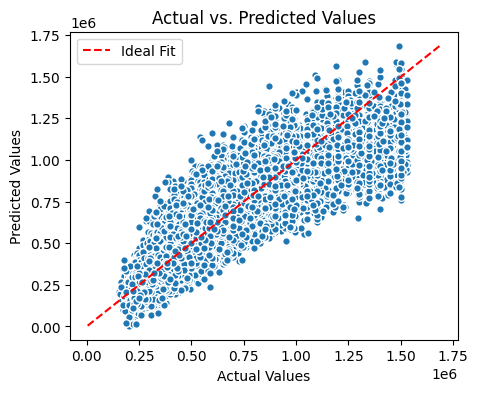

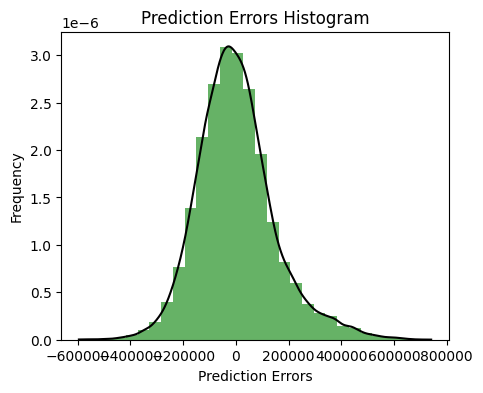

In [108]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

evaluate_model(y_test, y_pred)